In [181]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('credit_risk_dataset.csv')
print(df.head())


   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


In [182]:
mean = df['person_age'].mean()
std = df['person_age'].std()
print (mean)
print(std)

27.73459992019889
6.348078419225359


In [183]:
limite_inferior = 0
limite_superior = mean + 3 * std

outliers = df[(df['person_age'] < limite_inferior) | (df['person_age'] > limite_superior)]


In [184]:
df_filtrado = df[(df['person_age'] >= limite_inferior) & (df['person_age'] <= limite_superior)]
print(df[(df['person_age'] >= limite_inferior) & (df['person_age'] <= limite_superior)])

       person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32292          38         200000              MORTGAGE                0.0   
32293          38         110000              MORTGAGE                5.0   
32294          36          92000              MORTGAGE               18.0   
32295          42         101000              MORTGAGE                6.0   
32296          40          52000                  RENT                2.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status 

In [185]:
mean = df_filtrado['person_emp_length'].mean()
std = df_filtrado['person_emp_length'].std()
print (mean)
print(std)

4.769574153767102
4.0846916802918996


In [186]:
limite_inferior = 0
limite_superior = mean + 3 * std

outliers = df_filtrado[(df['person_emp_length'] < limite_inferior) | (df_filtrado['person_emp_length'] > limite_superior)]
print(outliers)


       person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
210            21         192000              MORTGAGE              123.0   
17834          34         948000              MORTGAGE               18.0   
17877          34         334000                   OWN               18.0   
17888          34          61200                  RENT               18.0   
...           ...            ...                   ...                ...   
32272          40          43000              MORTGAGE               18.0   
32280          36          53800              MORTGAGE               20.0   
32286          36          48686                  RENT               21.0   
32288          38          99996                   OWN               22.0   
32294          36          92000              MORTGAGE               18.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status 

C:\Users\alenm\AppData\Local\Temp\ipykernel_12236\2001108053.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df_filtrado[(df['person_emp_length'] < limite_inferior) | (df_filtrado['person_emp_length'] > limite_superior)]


In [187]:
df_filtrado = df_filtrado[(df['person_emp_length'] >= limite_inferior) & (df_filtrado['person_emp_length'] <= limite_superior)]
print(df_filtrado)

       person_age  person_income person_home_ownership  person_emp_length  \
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
5              21           9900                   OWN                2.0   
...           ...            ...                   ...                ...   
32291          42         600000                 OTHER                2.0   
32292          38         200000              MORTGAGE                0.0   
32293          38         110000              MORTGAGE                5.0   
32295          42         101000              MORTGAGE                6.0   
32296          40          52000                  RENT                2.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status 

C:\Users\alenm\AppData\Local\Temp\ipykernel_12236\3917408275.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtrado = df_filtrado[(df['person_emp_length'] >= limite_inferior) & (df_filtrado['person_emp_length'] <= limite_superior)]


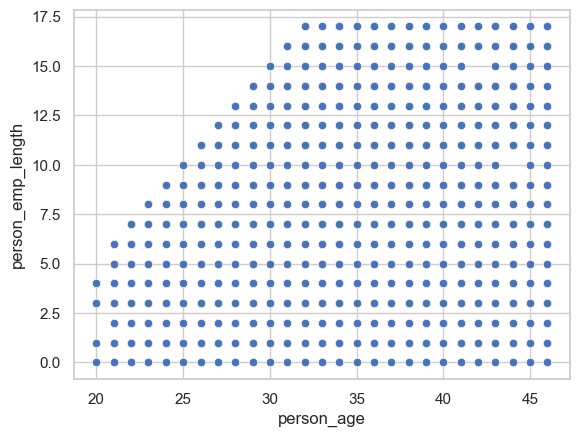

In [188]:

sns.scatterplot(x=df_filtrado['person_age'], y=df_filtrado['person_emp_length'], data=df_filtrado)
plt.show()

In [ ]:
sns.scatterplot(x=df_filtrado['person_age'], y=df_filtrado['person_income'], data=df_filtrado)


In [190]:
valores_unicos = df_filtrado['loan_intent'].unique()
print("Valores únicos:", valores_unicos)

Valores únicos: ['EDUCATION' 'MEDICAL' 'VENTURE' 'PERSONAL' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


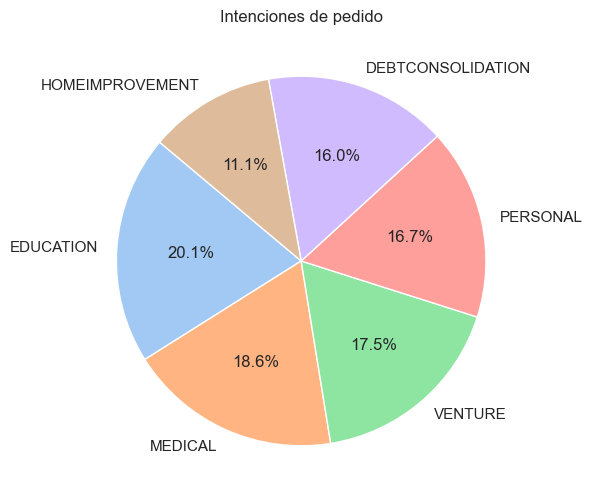

In [191]:

total_loan_intents = df_filtrado['loan_intent'].value_counts()
colores = sns.color_palette("pastel", len(total_loan_intents))

plt.figure(figsize=(8, 6))
plt.pie(total_loan_intents, labels=total_loan_intents.index, autopct='%1.1f%%', startangle=140, colors=colores)
plt.title("Intenciones de pedido")
plt.show()

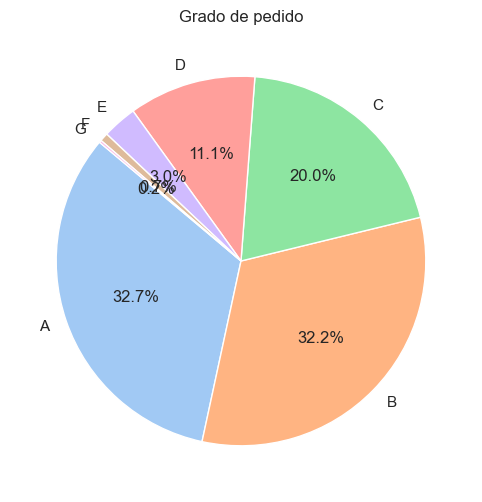

In [192]:

total_loan_grade = df_filtrado['loan_grade'].value_counts()
colores = sns.color_palette("pastel", len(total_loan_grade))

plt.figure(figsize=(8, 6))
plt.pie(total_loan_grade, labels=total_loan_grade.index, autopct='%1.1f%%', startangle=140, colors=colores)
plt.title("Grado de pedido")
plt.show()

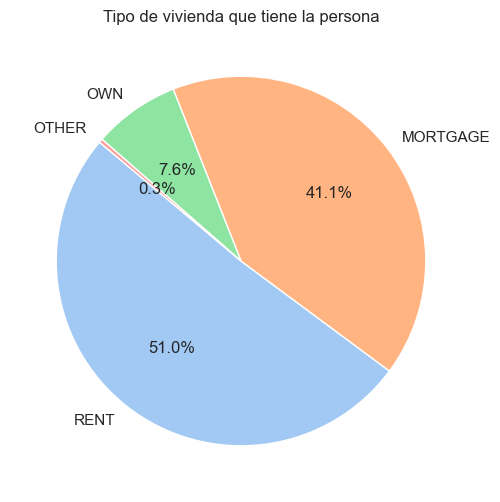

In [193]:

total_person_home_ownership = df_filtrado['person_home_ownership'].value_counts()
colores = sns.color_palette("pastel", len(total_person_home_ownership))

plt.figure(figsize=(8, 6))
plt.pie(total_person_home_ownership, labels=total_person_home_ownership.index, autopct='%1.1f%%', startangle=140, colors=colores)
plt.title("Tipo de vivienda que tiene la persona")
plt.show()

In [ ]:
print(df.to_string())

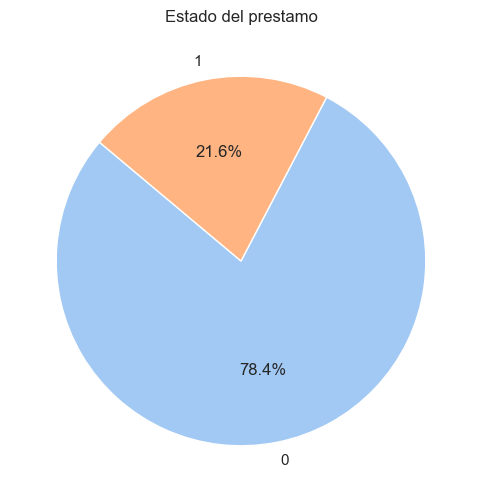

In [194]:

total_loan_status = df_filtrado['loan_status'].value_counts()
colores = sns.color_palette("pastel", len(total_loan_status))

plt.figure(figsize=(8, 6))
plt.pie(total_loan_status, labels=total_loan_status.index, autopct='%1.1f%%', startangle=140, colors=colores)
plt.title("Estado del prestamo")
plt.show()

In [195]:
cantidad = df_filtrado['loan_status'].value_counts()
print(cantidad)

loan_status
0    24208
1     6652
Name: count, dtype: int64


In [196]:
cantidad = df_filtrado['cb_person_default_on_file'].value_counts()
print(cantidad)

cb_person_default_on_file
N    25380
Y     5480
Name: count, dtype: int64


In [197]:
cantidad_total = df_filtrado[(df['loan_status'] == 1) & (df['cb_person_default_on_file'] == 'N')]
print(len(cantidad_total))


4595


C:\Users\alenm\AppData\Local\Temp\ipykernel_12236\1595719004.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cantidad_total = df_filtrado[(df['loan_status'] == 1) & (df['cb_person_default_on_file'] == 'N')]


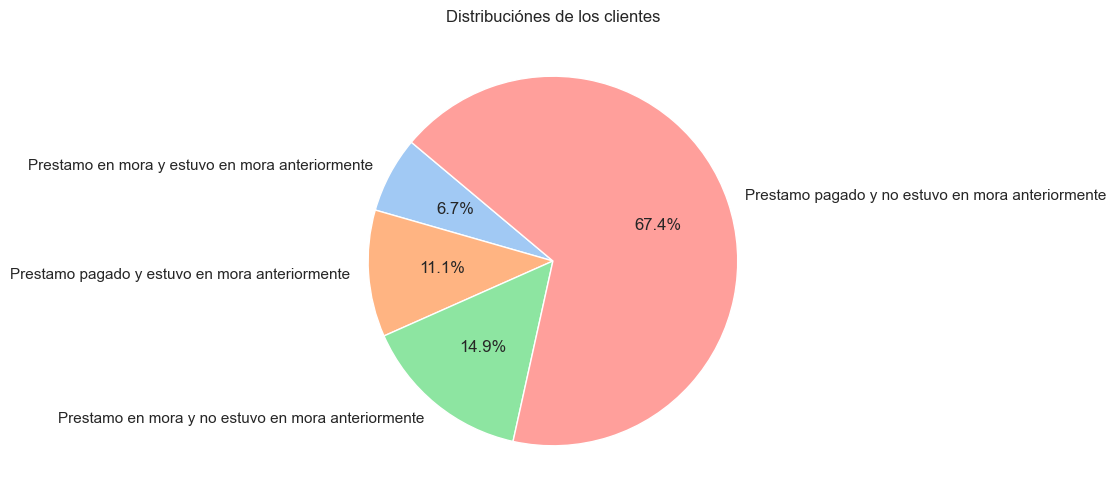

In [198]:
comb_1_Y = len(df_filtrado[(df_filtrado['loan_status'] == 1) & (df_filtrado['cb_person_default_on_file'] == 'Y')])
comb_0_Y = len(df_filtrado[(df_filtrado['loan_status'] == 0) & (df_filtrado['cb_person_default_on_file'] == 'Y')])
comb_1_N = len(df_filtrado[(df_filtrado['loan_status'] == 1) & (df_filtrado['cb_person_default_on_file'] == 'N')])
comb_0_N = len(df_filtrado[(df_filtrado['loan_status'] == 0) & (df_filtrado['cb_person_default_on_file'] == 'N')])

# Creamos una lista con los tamaños de cada sector
sizes = [comb_1_Y, comb_0_Y, comb_1_N, comb_0_N]

# Definimos las etiquetas para cada combinación
labels = [
    'Prestamo en mora y estuvo en mora anteriormente',
    'Prestamo pagado y estuvo en mora anteriormente',
    'Prestamo en mora y no estuvo en mora anteriormente',
    'Prestamo pagado y no estuvo en mora anteriormente'
]

# Creamos el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel", len(sizes)))
plt.title("Distribuciónes de los clientes")
plt.show()

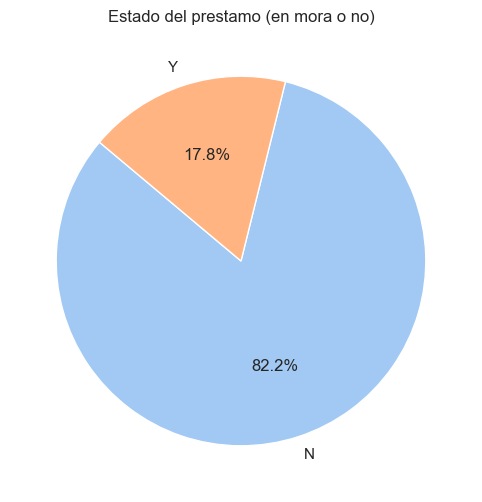

In [199]:

total_cb_person_default_on_file = df_filtrado['cb_person_default_on_file'].value_counts()
colores = sns.color_palette("pastel", len(total_cb_person_default_on_file))

plt.figure(figsize=(8, 6))
plt.pie(total_cb_person_default_on_file, labels=total_cb_person_default_on_file.index, autopct='%1.1f%%', startangle=140, colors=colores)
plt.title("Estado del prestamo (en mora o no)")
plt.show()

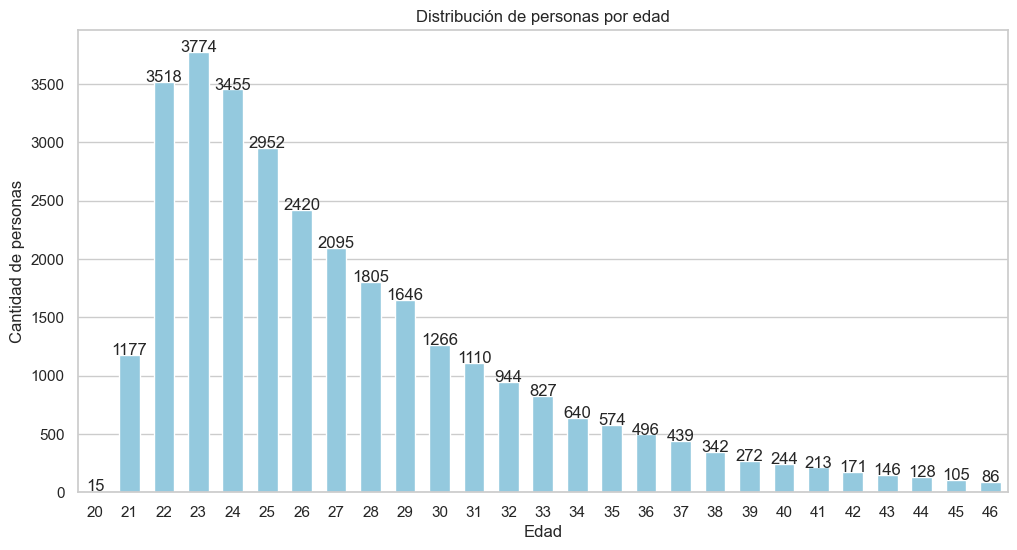

In [200]:
edad_counts = df_filtrado['person_age'].value_counts().sort_index()
sns.set(style="whitegrid")

# Creamos el gráfico de barras a partir de los conteos de edad con mayor separación
plt.figure(figsize=(12, 6))
sns.barplot(x=edad_counts.index, y=edad_counts.values, color="skyblue", width=0.6)  # width reducido para más espacio

# Añadimos etiquetas y título
plt.xlabel("Edad")
plt.ylabel("Cantidad de personas")
plt.title("Distribución de personas por edad")


# Ajustar los límites del eje x para dar más espacio
plt.xlim(-0.5, len(edad_counts) - 0.5)  # Ajusta los límites del eje x

# Añadimos etiquetas encima de cada barra para mostrar el valor
for index, value in enumerate(edad_counts.values):
    plt.text(x=index, y=value + 0.5, s=str(value), ha='center')

plt.show()

In [201]:
valores_unicos = df_filtrado['loan_grade'].unique()
print("Valores únicos:", valores_unicos)

Valores únicos: ['B' 'C' 'A' 'D' 'E' 'F' 'G']


In [202]:
df_filtrado['loan_grade'] = df_filtrado['loan_grade'].replace({'D': 0, 'B': 1, 'C': 2, 'A': 3, 'E': 4, 'F': 5, 'G': 6})
print(df['loan_grade'])

0        D
1        B
2        C
3        C
4        C
        ..
32576    C
32577    A
32578    B
32579    B
32580    B
Name: loan_grade, Length: 32581, dtype: object


<Axes: >

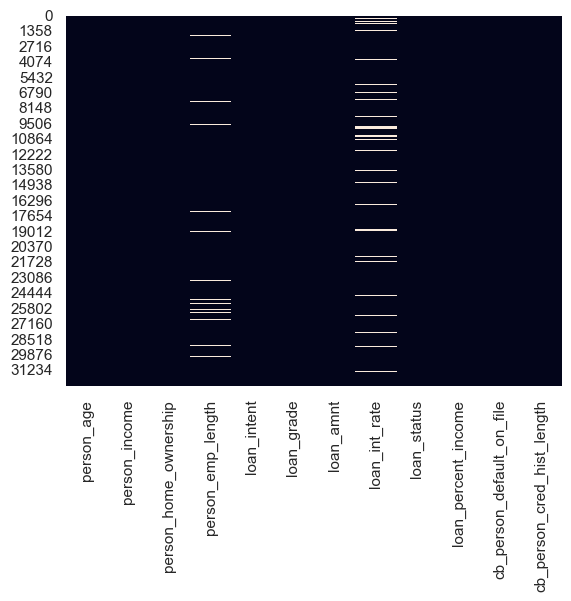

In [189]:
sns.heatmap(df.isnull(), cbar=False)

In [203]:
print(df.isnull().any())

person_age                    False
person_income                 False
person_home_ownership         False
person_emp_length              True
loan_intent                   False
loan_grade                    False
loan_amnt                     False
loan_int_rate                  True
loan_status                   False
loan_percent_income           False
cb_person_default_on_file     False
cb_person_cred_hist_length    False
dtype: bool


<Axes: xlabel='person_income', ylabel='loan_percent_income'>

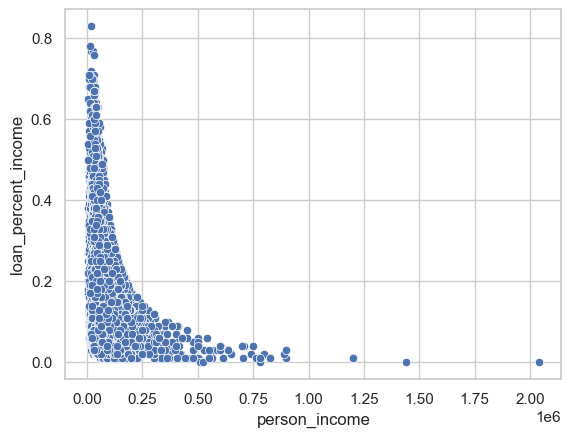

In [205]:
sns.scatterplot(x=df_filtrado['person_income'], y=df_filtrado['loan_percent_income'], data=df_filtrado)
